## Домашнее задание 3 (10 баллов)

### О задании

В этом домашнем задании вы получите опыт подготовки данных и EDA (Exploratory Data Analysis), приблизившись к реальной работе с данными с помощью уже знакомых вам инструментов: numpy, pandas, matplotlib и seaborn.

Вы будет работать с задачей кредитного скоринга (оценка надёжности клиента). Предоставляются данные о 1000 клиентов, про которых известно около 20 признаков и положительная или отрицательная оценка в качестве кредитуемого. Эти данные нужно будет подготовить, исследовать (в том числе с помощью средств визуализации) и даже попробовать предложить какую-нибудь формулу для условной оценки надёжности клиентов исходя из предоставленных данных. Описание данных:
https://www.rdocumentation.org/packages/evtree/versions/1.0-8/topics/GermanCredit

Каждый построенный график необходимо красиво оформить - для этого требуется как минимум указать его название, а также отметить, что изображено по каждой из осей.
Также по каждому графику ожидается небольшой комментарий с выводами.

*Функции, которые могут пригодиться при оформлении графиков: `.show()`, `.title()`, `.xlabel()`, `.ylabel()`*

In [ ]:
import pandas as pd

### Задание 1 (0.0 балла)

Прочитайте средствами pandas файл с данными по ссылке https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/homeworks/hw03-EDA/german_credit.csv. Выведите базовое представление таблицы (первые 5 и последние 5 строк, размер).

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2023/homeworks/hw03-plots/german_credit.csv")
data

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,2-3,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,2-3,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,2-3,unskilled - resident,0 to 2,no,yes,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking account,24,no credits taken/all credits paid back duly,furniture/equipment,1987,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,21,none,for free,1,unskilled - resident,3 or more,no,no,bad
996,no checking account,24,no credits taken/all credits paid back duly,others,2303,unknown/no savings account,>= 7 yrs,< 20,male : married/widowed,co-applicant,...,unknown / no property,45,none,rent,1,skilled employee/official,0 to 2,no,no,bad
997,... >= 200 DM / salary for at least 1 year,21,all credits at this bank paid back duly,others,12680,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,real estate,30,none,own,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
998,... < 0 DM,12,no credits taken/all credits paid back duly,furniture/equipment,6468,... >= 1000 DM,unemployed,25 <= ... < 35,male : married/widowed,none,...,real estate,52,none,rent,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad


### Задание 2 (0.5 балла)

Определите, есть ли пропуски в данных. Разделите признаки на количественные, бинарные, порядковые и категориальные.

In [ ]:
data.isna().mean()

status                     0.0
duration                   0.0
credit_history             0.0
purpose                    0.0
amount                     0.0
savings                    0.0
employment_duration        0.0
installment_rate           0.0
personal_status_sex        0.0
other_debtors              0.0
present_residence          0.0
property                   0.0
age                        0.0
other_installment_plans    0.0
housing                    0.0
number_credits             0.0
job                        0.0
people_liable              0.0
telephone                  0.0
foreign_worker             0.0
credit_risk                0.0
dtype: float64

Количественные: duration, amount, age (множество значений этих признаков - это число, отображающее длительность взятия кредита/размер кредита/возраст)

Бинарные: telephone, credit_risk, foreign_worker (всего два значения для каждого из признака - да/нет, хороший/плохой)

Порядковые: savings, employment_duration, installment_rate, other_debtors, present_residence, other_installment_plans, housing, status, number_credits, job, credit_historyб property, people_liable (отнесла их к порядковым, тк можно значения этих признаков распределить по уровням)

Категориальные: purpose, personal_status_sex (эти признаки могли бы быть порядковыми, но у меня в голове они совсем не поддаются разделению на уровни - особенно в personal_status_sex со значением "неодинокая женщина или одинокий мужчина")

### Задание 3 (0.5 балла)

Выведите среднюю сумму кредита (колонка amount) в каждой категории (колонка purpose), воспользовавшись методом groupby.

In [ ]:
data.groupby(['purpose'])['amount'].mean()

purpose
business               8209.333333
car (new)              5370.223301
car (used)             3066.983425
domestic appliances    2728.090909
furniture/equipment    2487.685714
others                 3062.948718
radio/television       1498.000000
repairs                3180.400000
retraining             4158.041237
vacation               1205.888889
Name: amount, dtype: float64

### Задание 4 (0.5 балла)


Какой процент клиентов моложе 30 лет (колонка age) снимает жилье (колонка housing)? А какой процент клиентов старше 40 лет снимает жилье?

In [ ]:
# Какой процент клиентов моложе 30 лет снимает жилье?
print((data.loc[data['age'] < 30]['housing'].values == 'rent').mean() * 100)
# Какой процент клиентов старше 40 лет снимает жилье?
print((data.loc[data['age'] > 40]['housing'] == 'rent').mean() * 100)

66.66666666666666
68.01470588235294


### Задание 5 (0.5 балла)

 У скольких иностранцев (foreign_worker) число кредитов (number_credits) больше 3?

In [ ]:
data.loc[data['foreign_worker'] == 'yes']['number_credits'].value_counts()

1      25
2-3    11
4-5     1
Name: number_credits, dtype: int64

### Задание 6 (1 балл)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Используя numpy и matplotlib, начнём с тренировки: постройте график функций $sin(x)$ и $cos(x)$ от $-\pi$ до $\pi$ из 100 точек c легендой и сеткой. Используйте для линий разные цвета, одна из них пусть будет пунктирной. Результат в этом и следующих заданиях на построение графиков должен получиться примерно как на картинке. Содержание подписей не должно обязательно совпадать, однако осмысленные подписи должны присутствовать на графиках.

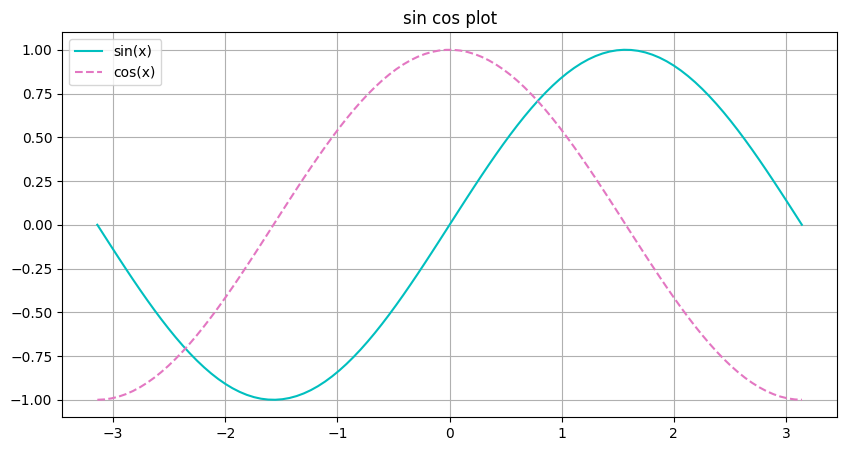

In [ ]:
x = np.linspace(-np.pi,np.pi,100)

s = np.sin(x)
c = np.cos(x)

plt.rcParams["figure.figsize"] = (10, 5)
plt.plot(x, s, label='sin(x)', color='c')
plt.plot(x, c, label='cos(x)', color='tab:pink', linestyle='dashed')
plt.title('sin cos plot')

plt.grid()
plt.legend(loc='upper left')

plt.show()

### Задание 7 (1 балл)

Рассмотрим сравнительное количество положительных и отрицательных кейсов в зависимости от размера текущего счёта. Постройте зеркальные горизонтальные гистограммы.

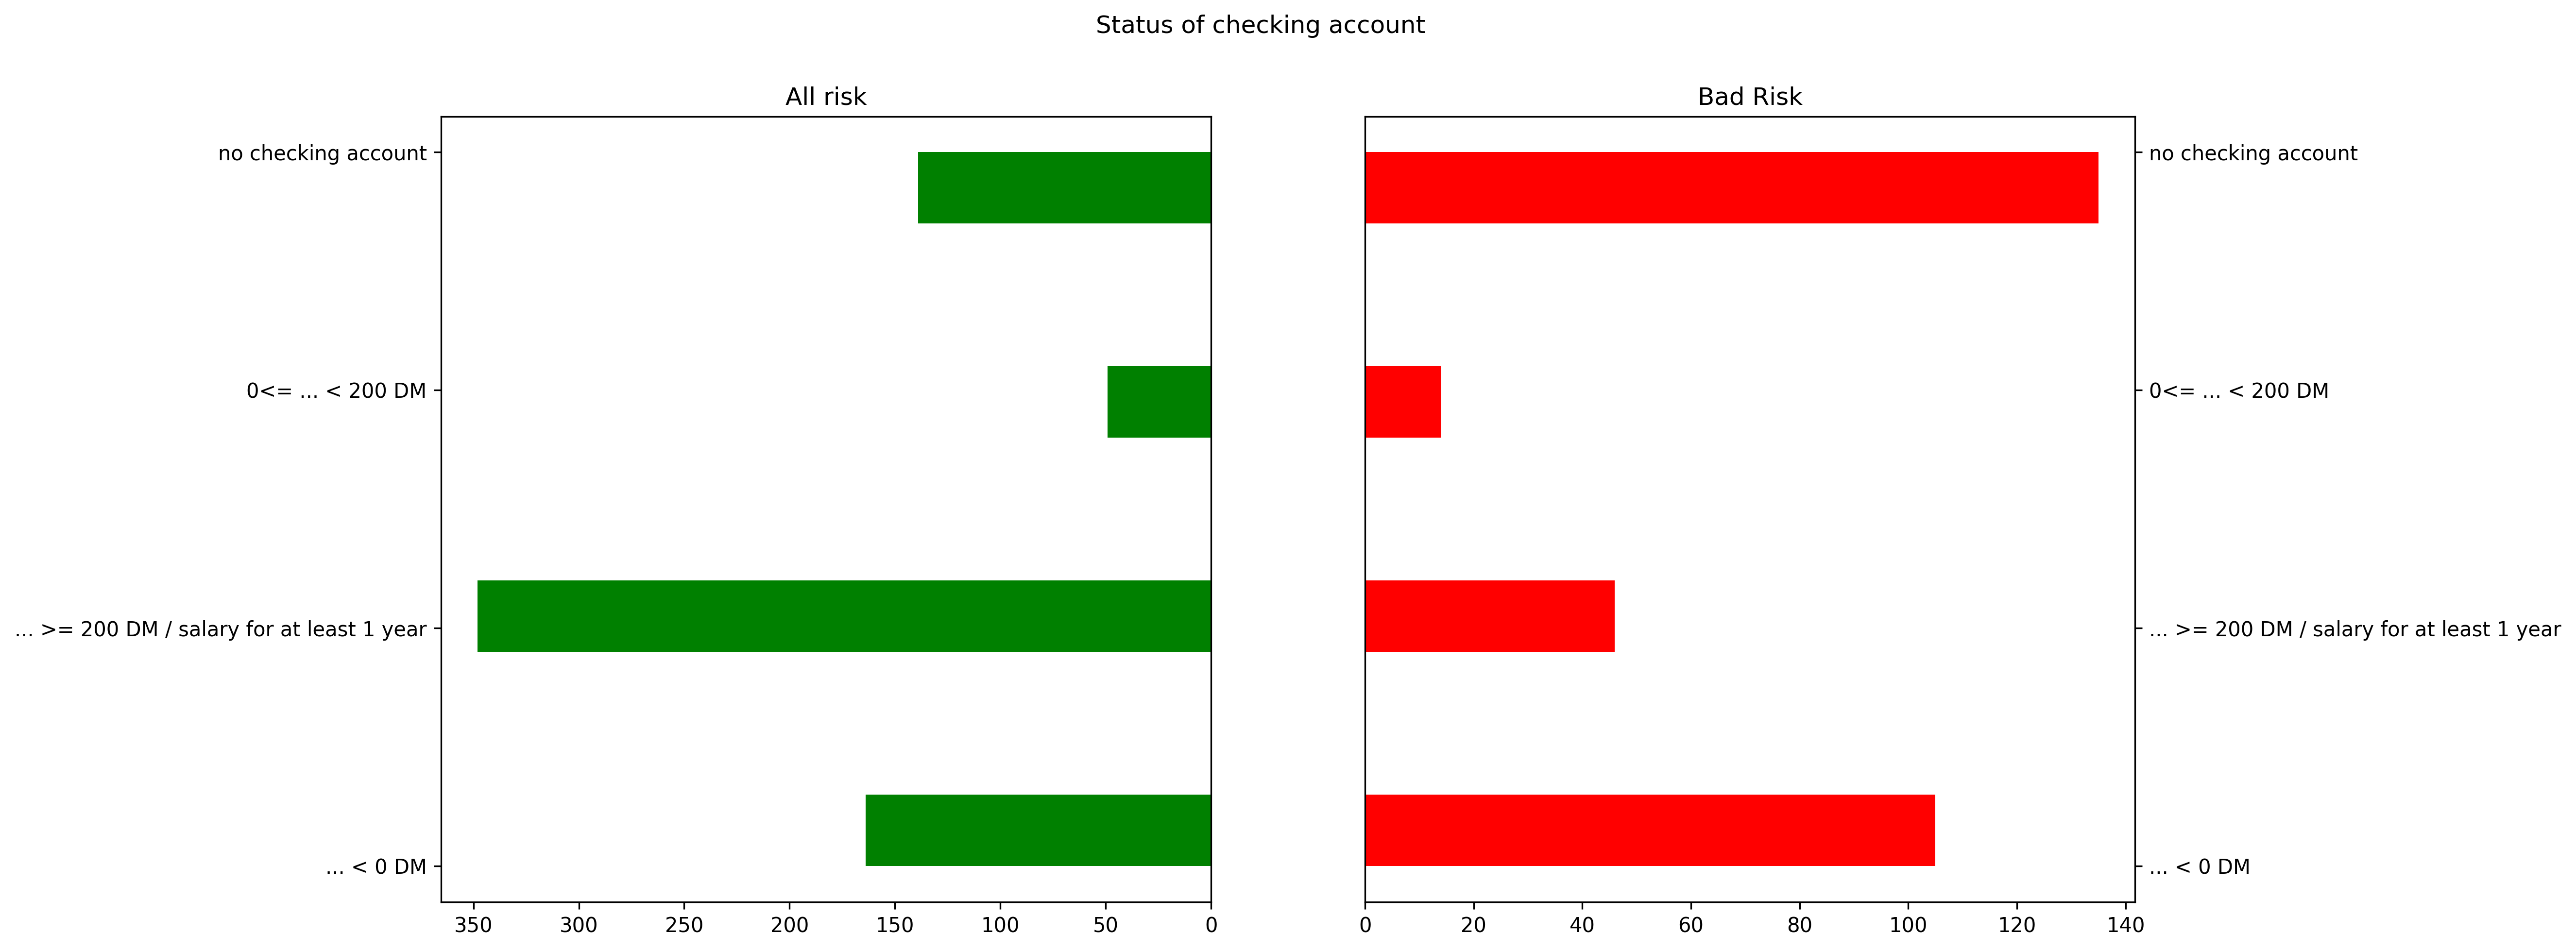

In [ ]:
plt.figure(figsize=(15, 7), dpi=300)

plt.subplot(1, 2, 1)
plt.title('All risk')
plt.hist(sorted(data[data['credit_risk']=='good']['status']), orientation='horizontal', color='g')
plt.gca().invert_xaxis()
plt.suptitle('Status of checking account')

plt.subplot(1, 2, 2)
plt.hist(sorted(data[data['credit_risk']=='bad']['status']), orientation='horizontal', color='r')
plt.title('Bad Risk')
plt.gca().yaxis.tick_right()

plt.show()

Подавляющее большинство дебиторов с хорошим кредитным риском относятся к тем, у кого на текущем счету >=200 DM или з/п за год, затем идут люди без текущего банковского счета или те, у кого есть задолженность(< 0 DM), в них количество дебиторов с хорошим кредитным риском примерно одинаково. Стоит заметить, что в этих категориях примерно поровну заемщиков с хорошим и плохим кредитным риском, при этом бОльшая часть отрицательных кейсов также принадлежит им.

### Задание 8  (0.5 балла)

In [ ]:
import seaborn as sns

Теперь постройте гистограмму для сравнения количества положительных и отрицательных кейсов в зависимости от размера сберегательного счёта с помощью seaborn. Какой способ вам больше нравится с точки зрения трудоёмкости написания кода? А с точки зрения восприятия результата?

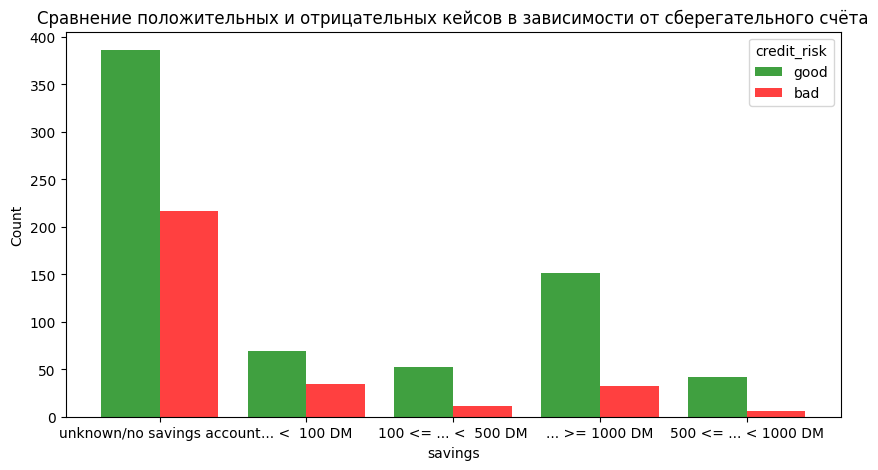

In [ ]:
sns.histplot(data, x='savings', hue='credit_risk', multiple='dodge', linewidth=0, shrink=.8, palette={'Green', 'Red'}).set_title('Сравнение положительных и отрицательных кейсов в зависимости от сберегательного счёта')

plt.show()

Большая часть рассматриваемых заемщиков - это люди, не имеющие сберегательного счета или с неизвестным сбер. счетом, эта категория и лидирует и в хорошем, и в плохом кредитном риске. Заемщиков с хорошим кредитным риском всегда больше, как минимум в два раза и более.

### Задание 9  (1 балл)

seaborn легко позволяет добавить ещё больше информации на один график. Для каждого размера сберегательного счёта мы можем оценить не только количество положительных и отрицательных кейсов, но и их распределение по возрасту, например. Постройте подходящую для этого визуализацию.

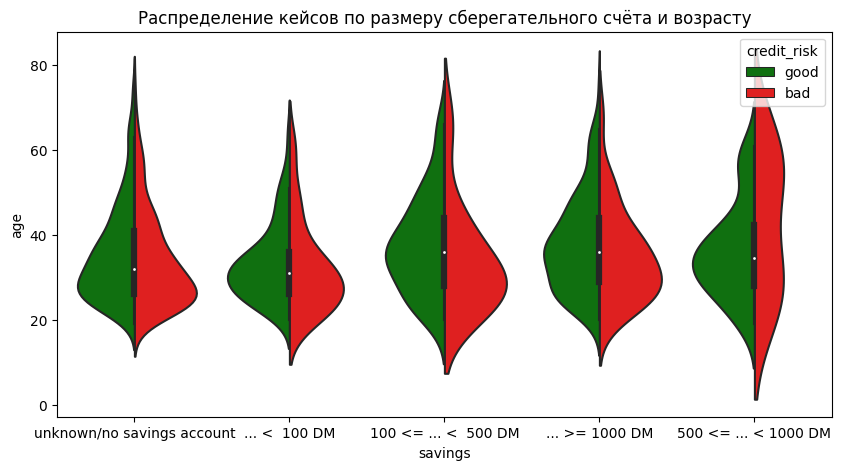

In [ ]:
sns.violinplot(data, x="savings", y="age", hue="credit_risk", split=True, palette={'Green', 'Red'}).set_title('Распределение кейсов по размеру сберегательного счёта и возрасту')

plt.show()

У заемщиков в возрастном промежутке 20-30 стабильно плохой кредитный риск при любом размере сберегательного счета, кроме промежутка от 500 до 1000 DM. При этом размере сберегательного счета распределение плохого кредитного риска по возрастам практически одинаково для любого возраста. При этом хороший кредитный риск наблюдается в возрасте 25-35 лет при любом размере сберегательного счёта.

### Задание 10  (0.5 балла)

Заканчивая с гистограммами, посмотрим на распределение положительных и отрицательных кейсов по возрастам, разместив их друг над другом. Добавим распределение всех взятых кредитов.

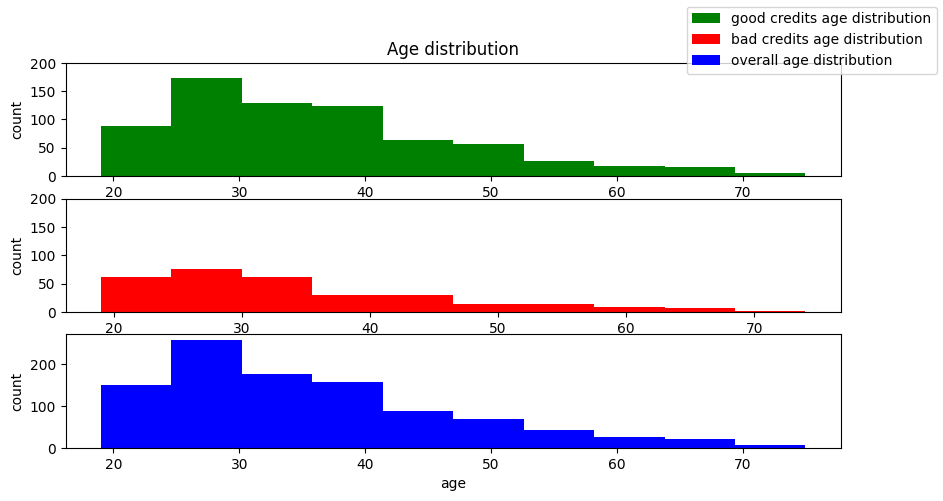

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1)

ax1.hist(data[data['credit_risk']=='good']['age'], color='Green', label='good credits age distribution')
ax1.set_ylabel('count')
ax1.set_ylim(0, 200)
ax1.title.set_text('Age distribution')


ax2.hist(data[data['credit_risk']=='bad']['age'], color='Red', linewidth=0, label='bad credits age distribution')
ax2.set_ylabel('count')
ax2.set_ylim(0, 200)

ax3.hist(data['age'], color='Blue', linewidth=0, label='overall age distribution')
ax3.set_ylabel('count')
ax3.set_xlabel('age')


fig.legend(loc='upper right')

plt.show()

Наиболее рассматриваемая категория - это заемщики возрастом 25-30 лет, именно у этой возрастной группы больше всего как положительных, так и отрицательных кейсов. При этом в случае негативных кейсов их количество не так сильно выбивается и примерно на равне на всем промежутке 20-35, а в положительных кейсах - резко выбивается, примерно в два раза больше чем возрастной категории 20-25 и в 1,5 раза больше группы 30-40. Случаев с хорошим кредитным риском всегда заметно больше при любом возрасте, чем с плохим.

### Задание 11  (0.5 балла)

Не менее полезной иногда может быть диаграмма рассеяния. Постройте такую диаграмму с продолжительностью и размерами кредитов в качестве осей. Обозначьте положительные и отрицательные кейсы разными цветами.

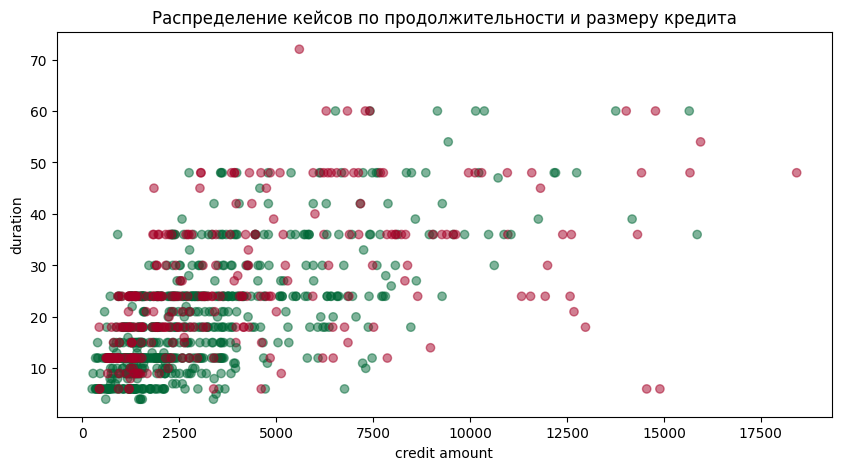

In [ ]:
plt.scatter(data['amount'], data['duration'], c=(data['credit_risk'] == 'good'), cmap='RdYlGn', alpha=0.5)
plt.title('Распределение кейсов по продолжительности и размеру кредита')
plt.xlabel('credit amount')
plt.ylabel('duration')

plt.show()

Заметим много красных точек в левом нижнем углу диаграммы, то есть кредиты на маленький срок и сумму. В правой часи графика также заметно больше красных точек, то есть с увеличением суммы кредита кредитный риск ухудшается. Оптимальный вариант исходя из графика - это небольшой кредит на небольшой срок, заметно преобладающее количество зеленых точек на графике в этой области.

### Задание 12  (1 балл)

Продвинемся глубже. Постройте 3D версию диаграммы рассеяния, добавив ось с возрастом.

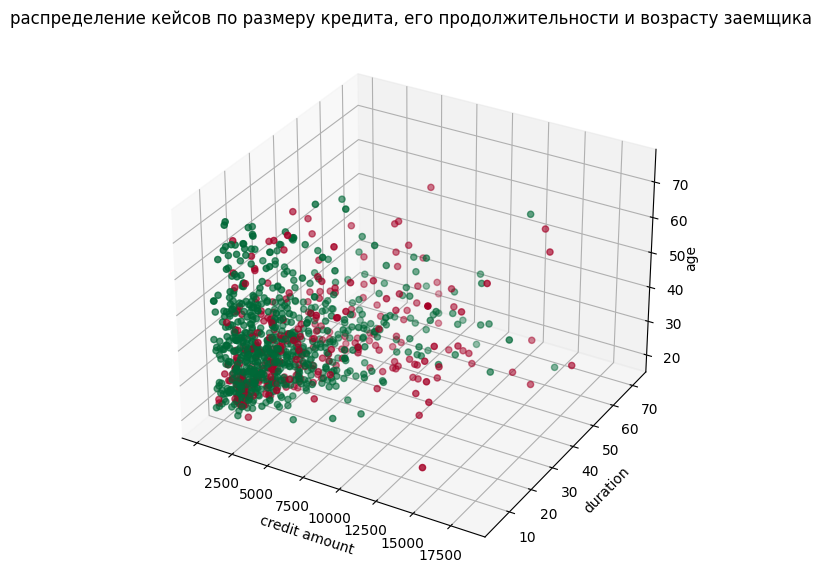

In [ ]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(projection='3d')
ax.scatter(data['amount'], data['duration'], data['age'], c=(data['credit_risk'] == 'good'), cmap='RdYlGn')
ax.set_xlabel("credit amount")
ax.set_ylabel("duration")
ax.set_zlabel("age", rotation=90)
ax.zaxis.labelpad=-3
plt.title('распределение кейсов по размеру кредита, его продолжительности и возрасту заемщика')

plt.show()

Аналогично предыдущему графику, оптимально брать небольшой кредит на небольшой срок. Однако лучше это делать в молодом возрасте - чем выше поднимаемся по шкале возраста, тем больше заметно красных точек с плохим кредитным риском.

### Задание 13  (0.5 балла)

Представьте все порядковые и бинарные признаки в виде числовых значений {0, ..., n - 1}, где n это количество значений признака. Избавьтесь от категориальных признаков.

Бинарные: telephone, credit_risk, foreign_worker (всего два значения для каждого из признака - да/нет, хороший/плохой)

Порядковые: savings, employment_duration, installment_rate, other_debtors, present_residence, other_installment_plans, housing, status, number_credits, job, credit_historyб property, people_liable (отнесла их к порядковым, тк можно значения этих признаков распределить по уровням)

### Задание 14  (2 балла)

По результатам предыдущего задания у вас должна получиться таблица, в которой все признаки так или иначе представлены числовыми значениями. Попробуйте придумать на основе проведённых исследований данных какую-нибудь формулу, связывающую целевую переменную с признаками, не используя готовых инструментов машинного обучения. По желанию вы можете исключить ещё какие-то признаки, или, наоборот, сформировать новые на основе имеющихся. Возможно, вы захотите отмасштабировать большие наборы численных значений некоторых признаков с помощью интервалов. Цель: реализовать функцию, которая будет принимать на вход набор признаков для объекта выборки и возвращать прогноз целевой переменной (0 или 1). Например, вы можете просто сложить все признаки и возращать ноль, если сумма отрицательная, а в противном случае единицу. Но наверняка можно придумать лучше!
Данные уже разделены на набор для обучения, который вы можете использовать как угодно, и тестовый, на котором нужно будет проверить вашу точность. Постарайтесь достичь точности хотя бы 0.6.

In [ ]:
def predict(Xtest: np.array) -> np.array:
    # your code here

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X = data.drop('credit_risk', 1).values
y = data['credit_risk'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)
# Используйте X_train и y_train на ваше усмотрение
# your code here
accuracy_score(y_test, predict(X_test))

IndentationError: expected an indented block after function definition on line 1 (4074300509.py, line 4)